# Physical Model of Living Systems
## Maryam Feizi - 2091504
### Homework 7

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Negative Feedback Loop
$$
\frac{dR}{dt} = \frac{\gamma}{1+(\frac{R}{k})^h} + l - \frac{R}{\tau}
$$

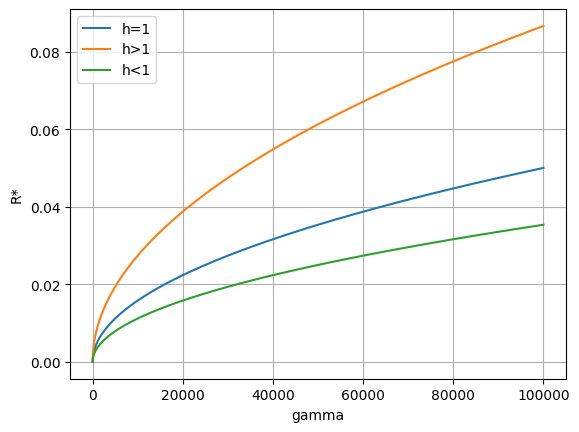

In [32]:
def R_stat (k,l,tau, gamma, h):
    m = np.sqrt((k**2+h*gamma*k+2*k*l+tau*(l**2))*tau)
    return 0.5*(-k+ l*tau+m)


gamma = np.linspace(0,1e5, 1000)
k = pow(10, -8)
l= 0
tau = 10
h1 = 1
h2 = 3
h3 = 0.5
stat_sol1 = R_stat(k,l, tau,gamma, h1)
stat_sol2 =R_stat(k,l, tau,gamma, h2)
stat_sol3 = R_stat(k,l,tau,gamma, h3)
plt.plot(gamma, stat_sol1, label="h=1")
plt.plot(gamma, stat_sol2, label="h>1")
plt.plot(gamma, stat_sol3, label="h<1")
plt.xlabel("gamma")
plt.ylabel("R*")
plt.title("Changimg environment in time")
plt.legend()
plt.grid()

### Positive Feedback Loop

$$
\frac{dR}{dt} = \frac{\gamma_{1}}{1 + (\frac{L}{k_{L}}) ^ {h_{L}}} + l_{1} - \frac{R}{\tau_{R}} \\ $$
$$
\frac{dL}{dt} = \frac{\gamma_{2}}{1 + (\frac{R}{k_{R}}) ^ {h_{R}}}+ l_{2} - \frac{L}{\tau_{L}}
$$

In [142]:
def positive_feedback(y, t, k, h, l, gamma, tau):
    # I assume h_L and h_R are equal also l_1 and l_2 are equivalent
    R , L = y
    dRdt = gamma/(1+pow(L/k, h)) +l -R/tau
    dLdt = gamma/(1+pow(R/k, h)) +l -L/tau

    return dRdt , dLdt


def func(k, h, l, gamma, tau):
    y = [10, 1]
    t = np.linspace(0, 100, 1000)
    solution = odeint(positive_feedback, y, t, args=(k, h, l, gamma, tau))
    R ,L = solution[-1] # Extract the equilibrium values
    return R ,L 

k=1
h=4 # h > 1
gamma = np.linspace(0,10, 100)
l=1
tau = 1

R, L = zip(*[func(k, h, l, g, tau) for g in gamma])


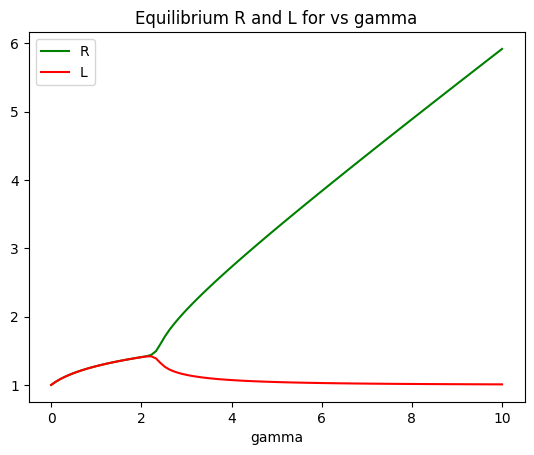

In [144]:
plt.plot(gamma,R, label= 'R', color = 'green')
plt.plot(gamma,L, label= 'L', color = 'red')
plt.xlabel('gamma')
plt.ylabel('')
plt.title("Equilibrium R and L for vs gamma")
plt.legend()


Try to combine two feedback loop (or simulating the genetic network shown in class or creating one yourself), simulate it and describe in few sentences the results of the simulations (like "what's going on" in the simulation).  

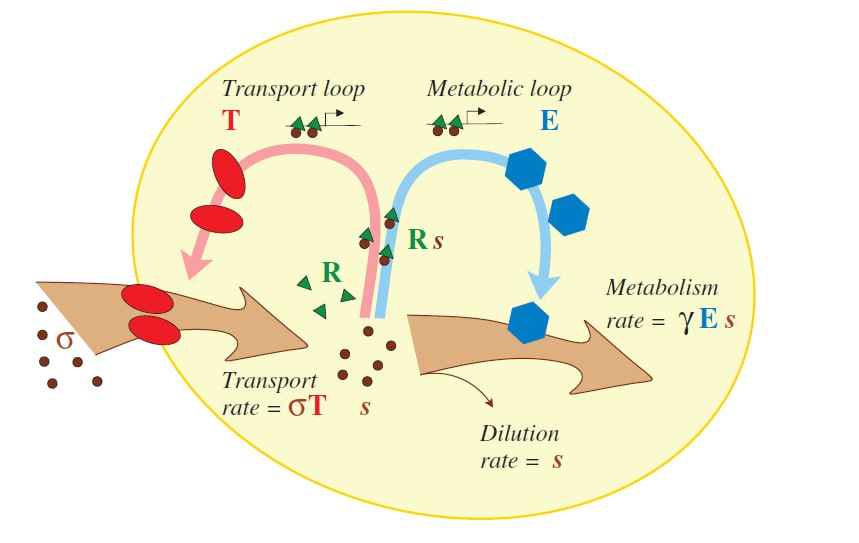

Let's assume both the transport enzyme $ T $ and the metabolic enzyme $ E $ are repressed by the bounded $ R $: that is $ [Rs] $ Therefore we get the following dynamics:

$$Rs = R_{tot}\frac{s}{s+1} \\ $$
$$\frac{dS}{dt} = \sigma T - \gamma E S - S\\$$

$$\frac{dT}{dt} = l  + \frac{1}{1 + (\frac{Rs}{k_{T}}) ^ {h_{T}}} - T\\ $$
$$\frac{dE}{dt} = l  + \frac{1}{1 + (\frac{Rs}{k_{E}}) ^ {h_{E}}} - E \\
$$


In [12]:
# Define the system of equations
def model(y, t, Rt, kT, kE, h, l, gamma, sigma):
    # I assume h_E and h_T are equivalent
    S, T, E = y

    Rs = Rt * S / (S + 1)

    dSdt = sigma * T - gamma * E * S - S
    dTdt = l + 1 / (1 + (Rs / kT)**h) - T
    dEdt = l + 1 / (1 + (Rs / kE)**h) - E

    return [dSdt, dTdt, dEdt]

# Function to calculate the equilibrium values for S, T, E and flux
def calculate_equilibrium_values(Rt, kT, kE, h, l,gamma,sigma):
    # Initial conditions
    y0 = [1.0, 1.0, 1.0]  # Replace with appropriate initial conditions
    t = np.linspace(0, 100, 1000)  # Adjust the time range as needed

    # Solve the system of equations
    solution = odeint(model, y0, t, args=(Rt, kT, kE, h, l,gamma,sigma))

    # Extract the equilibrium values
    S_eq, T_eq, E_eq = solution[-1]
    

    return S_eq, T_eq, E_eq

# Function to calculate the flux at equilibrium
def calculate_flux(Rt, kT, kE, h, l, gamma ,sigma):
    # Initial conditions
    y0 = [1.0, 1.0, 1.0]  # Replace with appropriate initial conditions
    t = np.linspace(0, 100, 1000)  # Adjust the time range as needed

    # Solve the system of equations
    solution = odeint(model, y0, t, args=(Rt, kT, kE, h, l,gamma,sigma))

    # Extract the equilibrium values
    S_eq, T_eq, E_eq = solution[-1]

    # Calculate the flux
    flux = sigma * T_eq

    return flux

In [25]:
# Parameters
Rt = 100  
kT = 1  
kE = 0.5 
h = 3  
l = 0   
gamma = 0.1 
sigma_values = np.linspace(0.1, 10, 100)

S , T, E = zip(*[calculate_equilibrium_values(Rt, kT, kE, h, l, gamma,sigma) for sigma in sigma_values])
flux_value = [calculate_flux(Rt, kT, kE, h, l, gamma,sigma) for sigma in sigma_values]

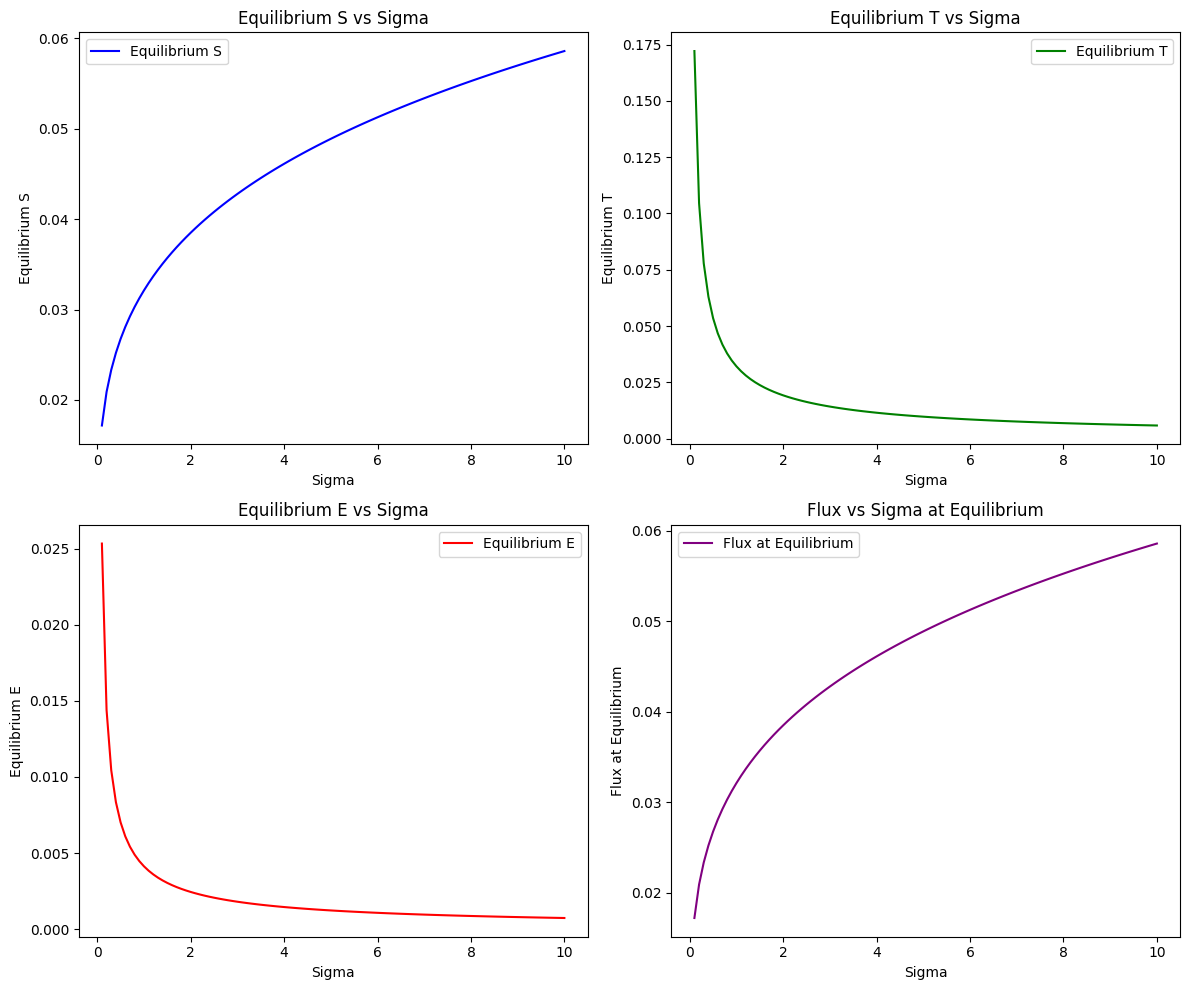

In [26]:
# Plot all results in a single figure with separate subplots and different colors
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot equilibrium values for S
axs[0, 0].plot(sigma_values, S, label='Equilibrium S', color='blue')
axs[0, 0].set_xlabel('Sigma')
axs[0, 0].set_ylabel('Equilibrium S')
axs[0, 0].set_title('Equilibrium S vs Sigma')
axs[0, 0].legend()

# Plot equilibrium values for T
axs[0, 1].plot(sigma_values, T, label='Equilibrium T', color='green')
axs[0, 1].set_xlabel('Sigma')
axs[0, 1].set_ylabel('Equilibrium T')
axs[0, 1].set_title('Equilibrium T vs Sigma')
axs[0, 1].legend()

# Plot equilibrium values for E
axs[1, 0].plot(sigma_values, E, label='Equilibrium E', color='red')
axs[1, 0].set_xlabel('Sigma')
axs[1, 0].set_ylabel('Equilibrium E')
axs[1, 0].set_title('Equilibrium E vs Sigma')
axs[1, 0].legend()

# Plot flux at equilibrium
axs[1, 1].plot(sigma_values, flux_value, label='Flux at Equilibrium', color='purple')
axs[1, 1].set_xlabel('Sigma')
axs[1, 1].set_ylabel('Flux at Equilibrium')
axs[1, 1].set_title('Flux vs Sigma at Equilibrium')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()